In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [116]:
df = pd.read_csv('./tvisa_final.csv')

In [117]:
# del df['Unnamed: 0']

In [118]:
df.head()
df.shape

(502, 13)

In [119]:
df.columns

Index(['file_name', 'url', 'title', 'date', 'type', 'core_terms', 'citation',
       'S-M-P', 'ID', 'aao citation', 'consel', 'order', 'decription'],
      dtype='object')

## Reformat data

### date

In [120]:
months = [
          'January',
          'February',
          'March',
          'April',
          'May',
          'June',
          'July',
          'August',
          'September',
          'October',
          'November',
          'December',
          'Feb',
          'SEPT'
]

months_replacement = [
                      'JAN',
                      'FEB',
                      'MAR',
                      'APR',
                      'MAY',
                      'JUN',
                      'JUL',
                      'AUG',
                      'SEP',
                      'OCT',
                      'NOV',
                      'DEC',
                      'FEB',
                      'SEP'
]

In [121]:
for i in range(len(months)):
  mask_month=df.date.map(lambda x: months[i] in x)
  for index, rows in df[mask_month].iterrows():
    string = rows.date
    df.date[index] = string.replace(months[i], months_replacement[i])

In [122]:
for index, rows in df.iterrows():
  string = rows.date
  df.date[index] = ((string.replace(" ", "")).replace(",","")).replace(".","")

In [123]:
for index, rows in df.iterrows():
  string = rows.date
  string_length = len(df.date[index])
  if string_length == 8:
    df.date[index] = string[0:3] + '0' + string[3:]

### Consel

In [124]:
df.consel.value_counts()

UNKNOWN                                                          242
represented                                                      222
not represented                                                   25
Counsel\n [*1] \nON BEHALF OF APPLICANT:\n SELF-REPRESENTED\n     13
Name: consel, dtype: int64

In [125]:
#consel
for index, rows in df.iterrows():
  string = rows.consel
  if string == 'UNKNOWN' or string == 'not represented':
    df.consel[index] = 'non-represented'
  elif string == 'represented':
    df.consel[index] = 'represented'
  else:
    df.consel[index] = 'self-represented'

In [126]:
df.consel.value_counts()

non-represented     267
represented         222
self-represented     13
Name: consel, dtype: int64

## Data Preperation

In [127]:
# df.is_family = df.is_family.fillna(False)
df.order = df.order.fillna('dismissed')

In [128]:
df.type.value_counts()

appeal    468
motion     34
Name: type, dtype: int64

In [129]:
mask_appeal=df.type.map(lambda x:'appeal' in x.lower())
df_appeal_only=df[mask_appeal]
df_appeal_only.order.value_counts()

The appeal is dismissed                                                                                                                                    367
The appeal will be dismissed                                                                                                                                31
The decision of the Director is withdrawn                                                                                                                   14
The appeal is summarily dismissed                                                                                                                           10
The appeal is rejected                                                                                                                                       9
The decision of the director is withdrawn                                                                                                                    6
The April 2, 2014 decision of the Vermont Serv

In [130]:
df_appeal_only.shape

(468, 13)

In [131]:
# According to above phrases, we can conclude that
cate_dict={'granted':['grant','sustained','withdraw','remanded','withdrawn','affirmed'],'dismissed':['dismiss', 'dismissed', 'dismissed\n'], 'denied': ['denied', 'rejected']}
def order_fun(order):
    order=str(order).lower()
    for category in cate_dict:
        for kw in cate_dict[category]:
            if kw in order:
                return category
    return None
ser_order_category=df_appeal_only.order.map(order_fun)
ser_order_category.value_counts()


dismissed    421
granted       37
denied        10
Name: order, dtype: int64

In [132]:
for index, rows in df_appeal_only.iterrows():
  string = rows.date
  df_appeal_only.date[index] = ((string.replace(" ", "")).replace(",","")).replace('.', '')

## Visualiazation

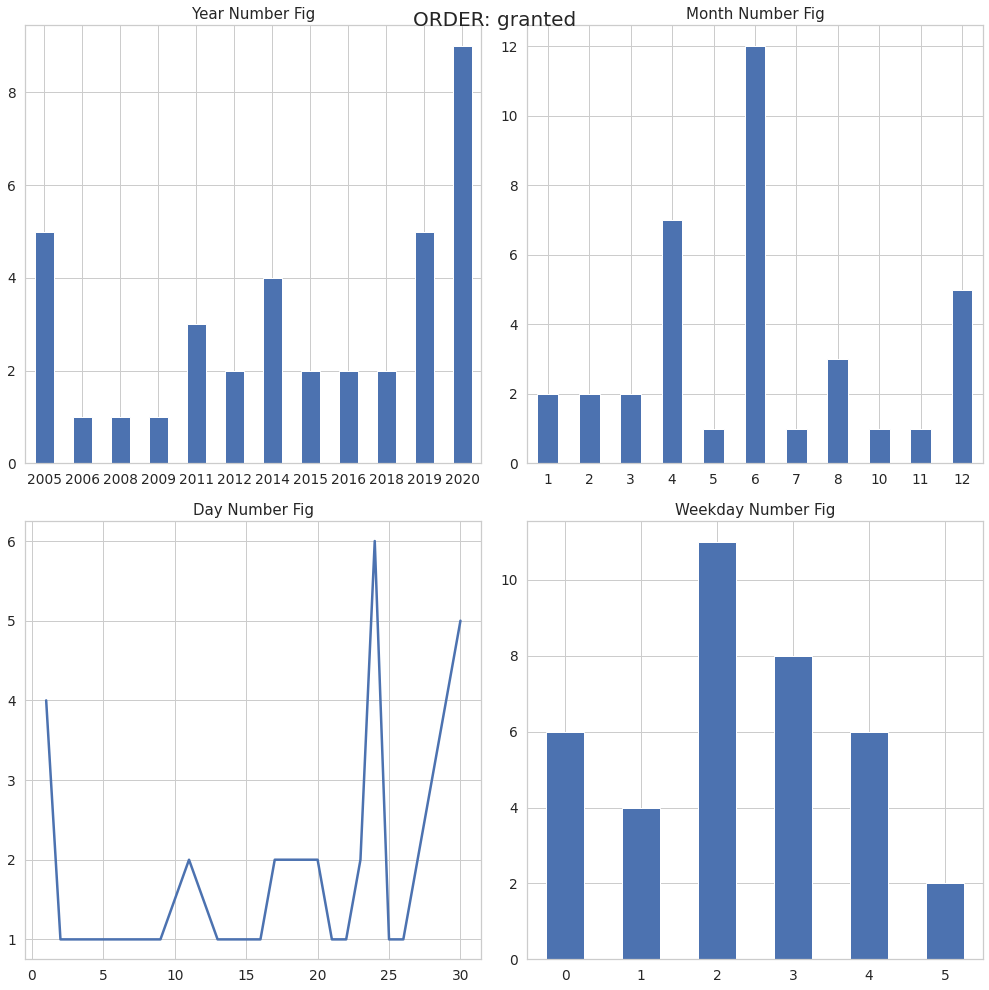

************************************************************


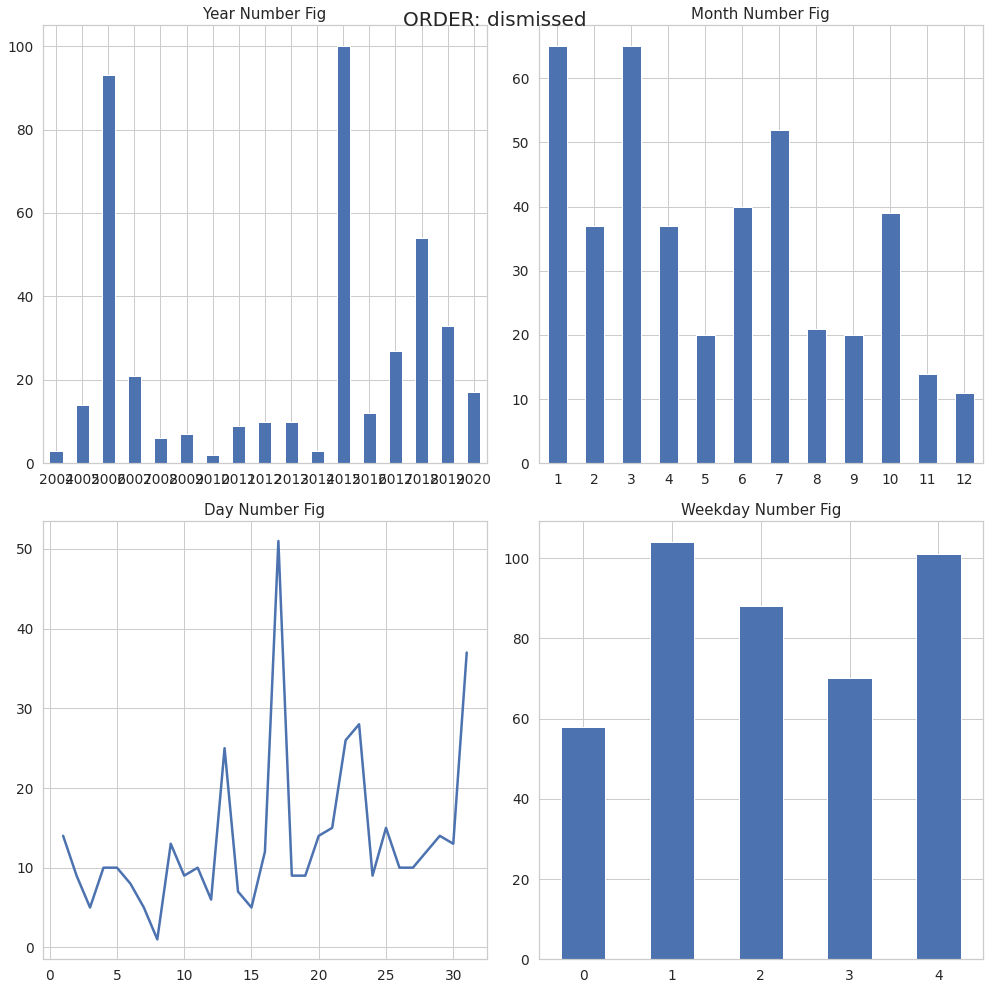

************************************************************


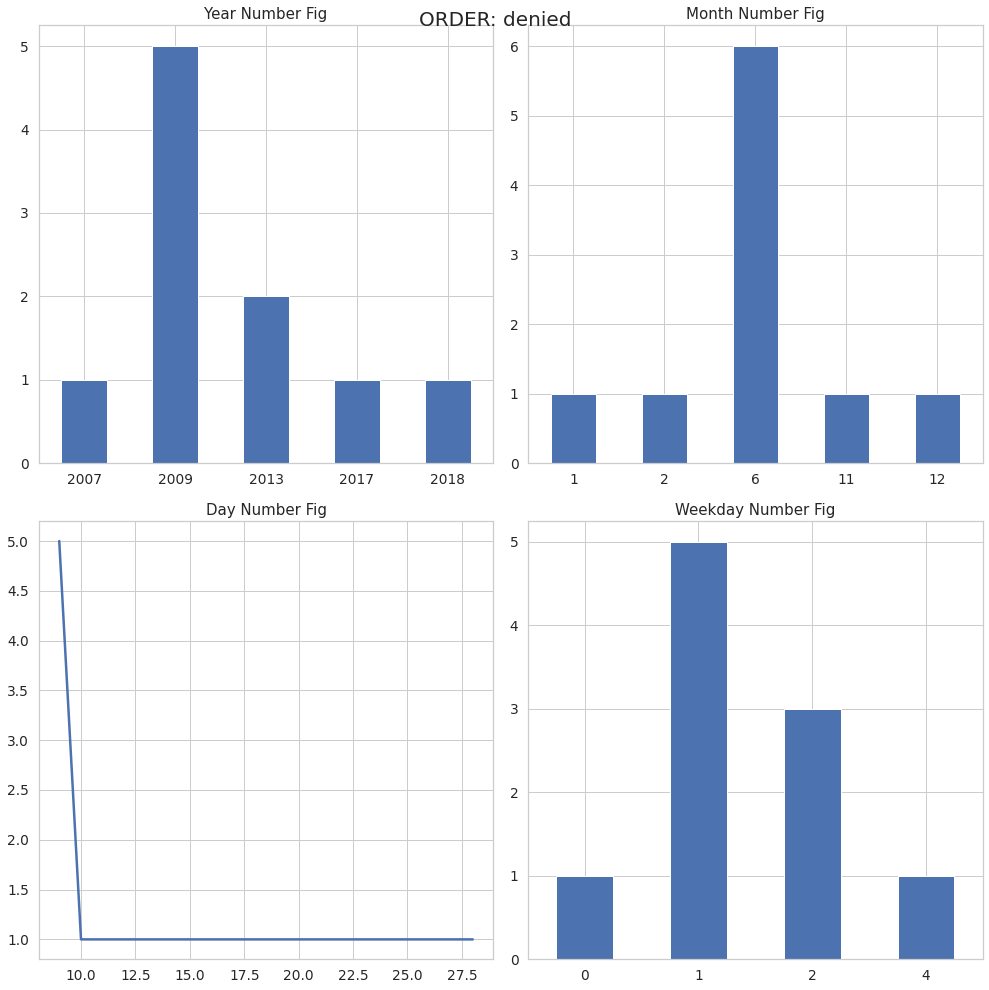

************************************************************


In [133]:
df_task4=df_appeal_only.copy()

def parse_date(dt_str):
    month_dict={'SEP':9, 'AUG':8, 'JUL':7, 'JUN':6, 'APR':4, 'MAR':3, 'FEB':2, 'JAN':1, 'DEC':12,
       'OCT':10, 'MAY':5, 'NOV':11}
    month=month_dict[dt_str[:3]]
    day=dt_str[3:5]
    year=dt_str[5:]
    return datetime.strptime(f'{year}-{month}-{day}','%Y-%m-%d')

df_task4['date']=df_task4['date'].map(parse_date)
for TYPE in ser_order_category.unique()[0:3]:
    df_tmp=df_task4[ser_order_category==TYPE]
    
    ser_year=df_tmp['date'].map(lambda x:x.year)
    ser_month=df_tmp['date'].map(lambda x:x.month)
    ser_day=df_tmp['date'].map(lambda x:x.day)
    ser_weekday=df_tmp['date'].map(lambda x:x.weekday())
    
    fig,axes=plt.subplots(2,2,figsize=(14,14))
    ser_year.value_counts().sort_index().plot(kind='bar',rot=0,title='Year Number Fig',ax=axes[0,0])
    ser_month.value_counts().sort_index().plot(kind='bar',rot=0,title='Month Number Fig',ax=axes[0,1])
    ser_day.value_counts().sort_index().plot(title='Day Number Fig',ax=axes[1,0])
    ser_weekday.value_counts().sort_index().plot(kind='bar',rot=0,title='Weekday Number Fig',ax=axes[1,1])
    plt.suptitle(f'ORDER: {TYPE}\n',fontsize=20)
    plt.tight_layout()
    plt.show()

    print('*'*60)


In [134]:
df_task4[ser_order_category=='dismissed']['consel'].value_counts()

non-represented     207
represented         203
self-represented     11
Name: consel, dtype: int64

In [135]:
df_task4[ser_order_category=='granted']['consel'].value_counts()

non-represented    25
represented        12
Name: consel, dtype: int64

In [136]:
df_task4[ser_order_category=='denied']['consel'].value_counts()

non-represented     8
represented         1
self-represented    1
Name: consel, dtype: int64

Text(0.5, 1.0, 'Class Distributions for dismissed')

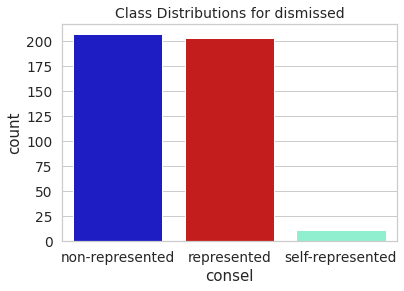

In [137]:
import seaborn as sns
colors = ["#0101DF", "#DF0101", "#7FFFD4"]

sns.countplot('consel', data=df_task4[ser_order_category=='dismissed'], palette=colors)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('Class Distributions for dismissed', fontsize=14)


Text(0.5, 1.0, 'Class Distributions for granted')

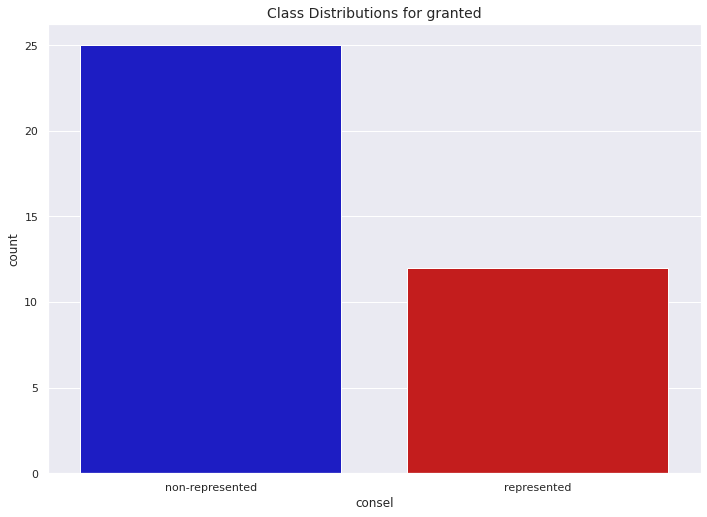

In [138]:
sns.countplot('consel', data=df_task4[ser_order_category=='granted'], palette=colors)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('Class Distributions for granted', fontsize=14)

Text(0.5, 1.0, 'Class Distributions for denied')

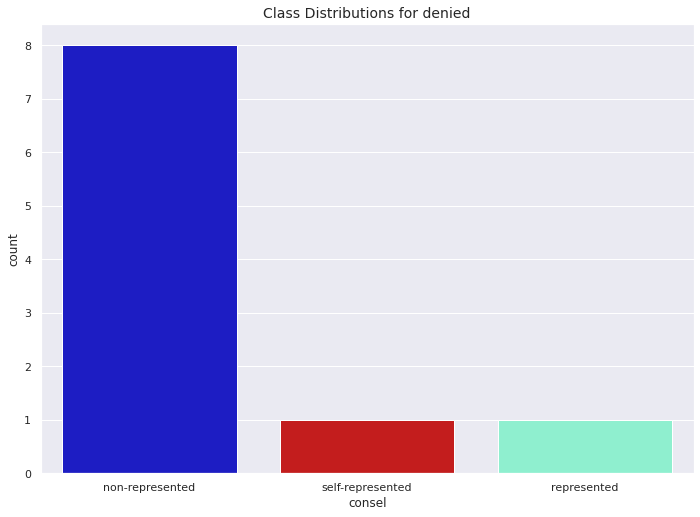

In [139]:
sns.countplot('consel', data=df_task4[ser_order_category=='denied'], palette=colors)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('Class Distributions for denied', fontsize=14)

# Topic Modeling

In [140]:
df_appeal_only.decription = df_appeal_only.decription.fillna('')

In [141]:
# df_granted_only = df_appeal_only[ser_order_category=='granted']
df_granted_only = df_appeal_only[ser_order_category=='denied']

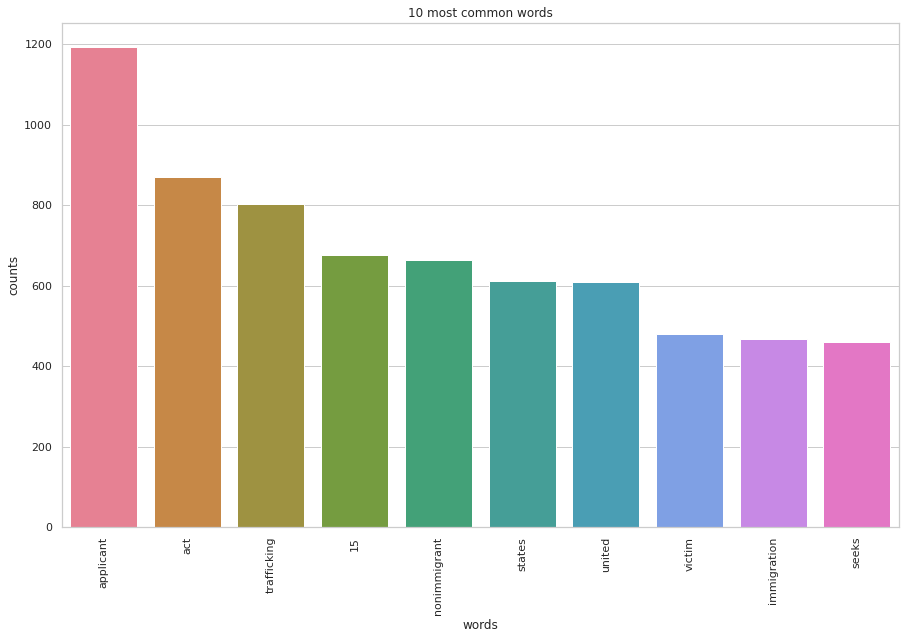

In [142]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english', analyzer='word', min_df=10)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_appeal_only['decription'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [143]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 9
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
applicant united states falcon agreed act pursuant employ fee

Topic #1:
nonimmigrant classification status derivative family ii immediate act seeks

Topic #2:
15 act classification nonimmigrant trafficking 1101 nationality 101 immigration

Topic #3:
trafficking applicant form act victim 15 severe nonimmigrant application

Topic #4:
applicant states united act pursuant order citizen redacted native


# Additional Graph

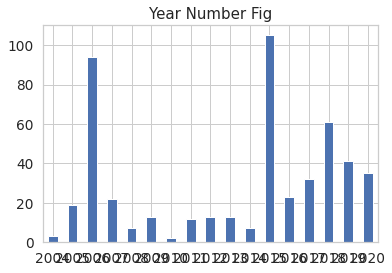

In [144]:
# all cases, inlcuding motion, appeal
df_tmp=df.copy()
df_tmp.date.tolist()
for index, rows in df_tmp.iterrows():
  string = rows.date
  df_tmp.date[index] = ((string.replace(" ", "")).replace(",","")).replace('.', '')

def parse_date(dt_str):
    month_dict={'SEP':9, 'AUG':8, 'JUL':7, 'JUN':6, 'APR':4, 'MAR':3, 'FEB':2, 'JAN':1, 'DEC':12,
       'OCT':10, 'MAY':5, 'NOV':11}
    month=month_dict[dt_str[:3]]
    day=dt_str[3:5]
    year=dt_str[5:]
    return datetime.strptime(f'{year}-{month}-{day}','%Y-%m-%d')

df_tmp['date']=df_tmp['date'].map(parse_date)


ser_year=df_tmp['date'].map(lambda x:x.year)
ser_month=df_tmp['date'].map(lambda x:x.month)
ser_day=df_tmp['date'].map(lambda x:x.day)
ser_weekday=df_tmp['date'].map(lambda x:x.weekday())
  
ser_year.value_counts().sort_index().plot(kind='bar',rot=0,title='Year Number Fig')
plt.rcParams["figure.figsize"] = [30,15]
plt.show()